## Analytical Posterior

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [18]:
N = 10000

alpha_true_mean = 1.5
beta_true_mean = 2 

alpha_true_var = .5

beta_true_var = .5

alpha_true = np.random.normal(alpha_true_mean, alpha_true_var, N)
beta_true = np.random.normal(beta_true_mean, beta_true_var, N)
err = 0.4



# alpha_true = 1.5
# beta_true = 2
# err = 0.4

x = np.random.uniform(0, 2, N)

y = alpha_true * x + beta_true + np.random.randn(np.size(x)) * err

alpha = np.linspace(-10+alpha_true_mean, 10+alpha_true_mean, 300)
beta = np.linspace(-10+beta_true_mean, 10+beta_true_mean, 300)

prior = {'mu_alpha': 3, 'var_alpha': 0.05, 'mu_beta': 2.5, 'var_beta': 0.05} 


In [19]:
posterior = np.empty([np.size(alpha), np.size(beta)])
likelihood = np.empty([np.size(alpha), np.size(beta)])

In [20]:
def posterior_calc(a, b):
    dy = y - a * x - b
    
    ivar = 1 / err**2
    lnlikeli =  -0.5 * (N* np.log(2*np.pi) + np.sum(2*np.log(err)) + np.sum(dy**2 * ivar))
    lnprior_a = -.5 * (a - prior['mu_alpha'])**2 / prior['var_alpha']**2
    lnprior_b = -.5 * (b - prior['mu_beta'])**2  / prior['var_beta']**2
#     lnprior_s = -.5 * (s-prior['mu_err'])**2  / prior['var_err']**2
    lnposterior = lnlikeli + lnprior_a + lnprior_b #+ lnprior_s
    if np.isnan(lnposterior):
        lnposterior = -np.inf
    if np.isnan(lnlikeli):
        lnlikeli = -np.inf
    return lnlikeli, lnposterior

In [21]:
for ia, a in enumerate(alpha):
    for ib, b in enumerate(beta):
            likelihood[ia][ib], posterior[ia][ib] = posterior_calc(a, b)

In [22]:
# posterior_sigma = np.sum(posterior, 0)
# posterior_beta = posterior_beta

posterior_beta = np.sum(posterior, 0)
# posterior_alpha = proto_posterior_alpha

posterior_alpha = np.sum(posterior, 1)

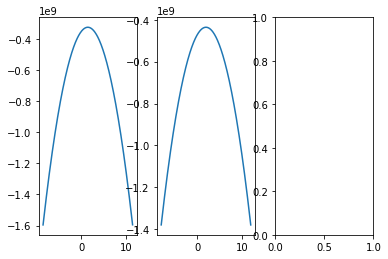

In [23]:
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3)
ax1.plot(alpha, posterior_alpha)
ax2.plot(beta, posterior_beta)
# ax3.plot(sigma, posterior_sigma)

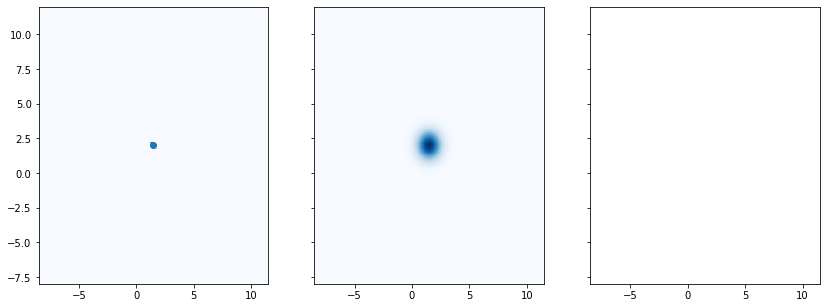

In [24]:
fig,axes = plt.subplots(1, 3, figsize=(14,5.1), sharex=True, sharey=True)

axes[0].pcolormesh(alpha, beta, posterior, cmap='Blues', vmin=posterior.max()-1024, vmax=posterior.max())
axes[0].plot(alpha_true_mean, beta_true_mean, marker = 'o', zorder=10)

true_prior_var = st.multivariate_normal(mean=[alpha_true_mean, beta_true_mean], cov=[[alpha_true_var, 0], [0, beta_true_var]])

true_prior = np.empty([np.size(alpha), np.size(beta)])

for ia, a in enumerate(alpha):
    for ib, b in enumerate(beta):
        true_prior[ia][ib] = true_prior_var.pdf([a, b])

axes[1].pcolormesh(alpha, beta, true_prior, cmap='Blues')
axes[2] = plt.cop

In [25]:
true_prior_var.pdf([alpha_true_mean, beta_true_mean+5])

4.420669830983553e-12

In [26]:
alpha_grid

NameError: name 'alpha_grid' is not defined

In [ ]:
np.shape(np.outer(alpha_true, beta_true))

In [ ]:
alpha_beta_true